## Get statistics from PARSPORT DVHs stored in dataframe
e.g. D90, V100, D2cc etc.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
## read in full dataset

full = False

if full:
    df = pd.read_pickle(r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_all_sides_pkl.pkl")
else:
    file_to_load = r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_update_16Sep16.pkl"
    df = pd.read_pickle(file_to_load)
#df = pd.read_hdf(r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_all_sides_hdf.hdf5")
#df.to_pickle(r"C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Data to Import\parsport\dvhs_single_file\parsport_dvh_all_sides_pkl.pkl")
df.head(3)

pt_id             1001                                            1002  \
side             right                                           bilat   
side_dif  -21.99190852                                    -37.32848122   
type         conformal                                            imrt   
structure   dose_(cgy)   cord l_parotid r_parotid pharynx   dose_(cgy)   
0                  0.0  100.0     100.0     100.0   100.0          0.0   
1                  1.0  100.0     100.0     100.0   100.0          1.0   
2                  2.0  100.0     100.0     100.0   100.0          2.0   

pt_id                                        1003    ...           6003  \
side                                        bilat    ...           left   
side_dif                              -13.5860905    ...    11.93829139   
type                                    conformal    ...           imrt   
structure r_parotid l_parotid pharynx  dose_(cgy)    ...      r_parotid   
0             100.0     100.0   100.0         0.0    ...          100.0   
1             100.0     100.0   100.0         1.0    ...          100.0   
2             100.0     100.0   100.0         2.0    ...          100.0   

pt_id            6004                            6005                      \
side             left                            left                       
side_dif  38.41823644                     3.022384226                       
type             imrt                       conformal                       
structure  dose_(cgy) l_parotid r_parotid  dose_(cgy) l_parotid r_parotid   
0                 0.0     100.0     100.0         0.0     100.0     100.0   
1                 1.0     100.0     100.0         1.0     100.0     100.0   
2                 2.0     100.0     100.0         2.0     100.0     100.0   

pt_id            6006                      
side             left                      
side_dif  4.303579758                      
type        conformal                      
structure  dose_(cgy) l_parotid r_parotid  
0                 0.0     100.0     100.0  
1                 1.0     100.0     100.0  
2                 2.0     100.0     100.0  

[3 rows x 259 columns]

In [100]:
## try and make a set of folders for each patient.
run = False

if run == True:

    ## get list of patients form the dataframe and use these as the folder names
    pt_list_all = []
    for i in range(len(df.columns)):
        pt_list_all.append(df.columns[i][0])

    pt_list = []
    [pt_list.append(i) for i in pt_list_all if not pt_list.count(i)]
    #print(pt_list) #70 patients
    ## can remove patients from list if needed
    remove = ['1001'] # remove pateint 1001 as folder already exists with the required data
    pt_list = [i for i in pt_list if i not in remove]
    print(pt_list)

    ## make folders
    import os
    root_dir = r'C:\Users\mb22\OneDrive\PhD\Quasar Shared\Data\Trials\PARSPORT\Test\\'
    print(root_dir)
    for i in range(len(pt_list)):
        if os.path.isdir(root_dir+pt_list[i]) == False: # check if the folder already exists, if not then make it
            os.mkdir(root_dir+pt_list[i])
else:
    print('not run: no new folders created')

not run: no new folders created


In [101]:
## select a patient
pt = '1001'
pt_df = df[pt]
pt_df.head(3)

side             right                                   
side_dif  -21.99190852                                   
type         conformal                                   
structure   dose_(cgy)   cord l_parotid r_parotid pharynx
0                  0.0  100.0     100.0     100.0   100.0
1                  1.0  100.0     100.0     100.0   100.0
2                  2.0  100.0     100.0     100.0   100.0

In [102]:
## plot the dose vs organ value (%)
pt='1001'
struct = 'r_parotid'

def dvh_plot(df,pt,struct):
    ## can supply slice(None) as a filter which does not exclude anything
    df_pt_struct = df.xs((pt,struct), level=('pt_id','structure'), axis=1,drop_level=False)
    df_pt_dose = df.xs((pt,'dose_(cgy)'), level=('pt_id','structure'), axis=1,drop_level=False)
    plt.plot(df_pt_dose,df_pt_struct)
    plt.xlabel('Dose (cGy)')
    plt.ylabel('Structure Volume (%)')
    #plt.title('Patient: ' + pt + ', Structure: ' + struct)
    dvh = (df_pt_dose.values,df_pt_struct.values)
    return dvh # return the dvh data values as a tuple

In [103]:
## function to only return the dvh values without plotting

def dvh_data(df,pt,struct):
    ## can supply slice(None) as a filter which does not exclude anything
    df_pt_struct = df.xs((pt,struct), level=('pt_id','structure'), axis=1,drop_level=False)
    df_pt_dose = df.xs((pt,'dose_(cgy)'), level=('pt_id','structure'), axis=1,drop_level=False)
    dvh = {'dose':df_pt_dose.values,'value':df_pt_struct.values}
    return dvh # return the dvh data values as a dictionary

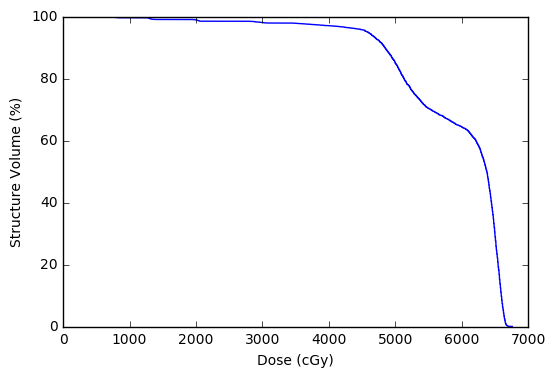

In [104]:
abc = dvh_plot(df=df,pt='1004',struct='pharynx') ##  easy to use for multiple patients/structures
#plt.plot(abc[0],abc[1]) ## plot using the returned DVH values

float64


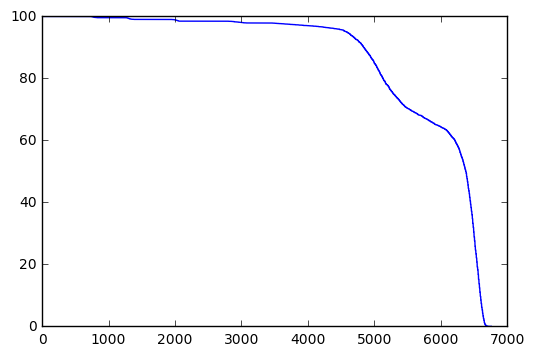

In [105]:
## get stats from dvh data
## use data returned from 
test =  dvh_data(df=df,pt='1004',struct='pharynx')
plt.plot(test['dose'],test['value'])
print(test['value'].dtype)

In [106]:
def dvh_mean(doses,ddvh_vals):
    """
    Calculate the mean dose form a given dvh
    supply arrays of doses and ddvh values. Should be same length
    """
    weighted_vals = [doses[i]*ddvh_vals[i] for i in range(len(ddvh_vals))]
    mean = sum(weighted_vals)/sum(ddvh_vals)
    return mean

In [107]:
pt = '1001'
struct = 'l_parotid'

## plots the differntial dvh alongside the cumulative dvh
def dvh_plot_diff(df,pt,struct,plot=True):
    data = dvh_data(df,pt,struct)
    vals = data['value']
    doses = data['dose']
#vals = test['value']
#doses = test['dose']
    d_flat = np.nan_to_num(doses.flatten()) ##  values are flattened into single row, and then any 'nan's are converted to 0
    ddvh_flat = np.nan_to_num(-np.ediff1d(vals.flatten(),to_end=0))
    cdvh_flat = np.nan_to_num(vals.flatten())
#d_flat = doses.flatten()
#ddvh_flat = np.ediff1d(vals.flatten(),to_end=0)
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    plt_cdvh = ax1.plot(doses,vals,color='blue',label='cDVH')
    ax1.set_ylabel('Total Vol (%)')
    ax1.set_xlabel('Dose (cGy)')
    
    if plot == True:
        ax2 = ax1.twinx()
        plt_ddvh = ax2.plot(d_flat,ddvh_flat,alpha=0.5,color='green',label='dDVH')
        ax2.set_ylabel('Diff Vol (%)')

    ## create legend for both axis
    if plot==True:
        lns = plt_cdvh + plt_ddvh
    else:
        lns = plt_cdvh
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='upper left')
    #plt.legend(loc='best')
    
    plt.show()
    
    ## calculate some stats
    mean_dose=dvh_mean(d_flat,ddvh_flat)
    return {'dose':d_flat,'cdvh':cdvh_flat,'ddvh':ddvh_flat,'mean':mean_dose}

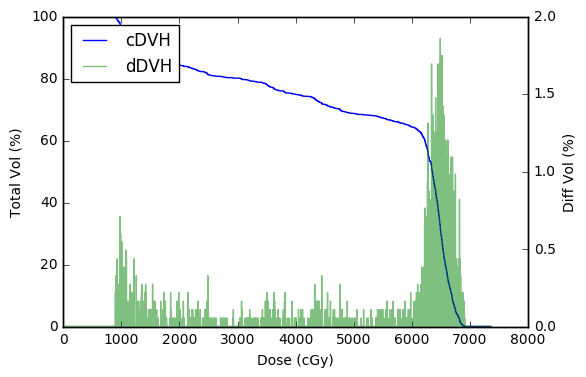

5181.3 cGy


In [108]:
pt = '1001'
struct = 'pharynx'
abc123 = dvh_plot_diff(df=df,pt=pt,struct=struct,plot=True)
print(round(abc123['mean'],1),'cGy')

5181.2568306


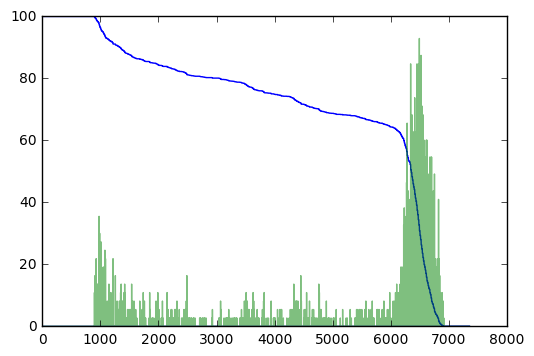

In [109]:
## using the values returned from the dvh_data function for the plot
plt.plot(abc123['dose'],abc123['cdvh'])
plt.plot(abc123['dose'],50*abc123['ddvh'],alpha=0.5) ##  note ddvh x50 to see on same axis for simplicity

## to get the mean of the dose to the organ, need to do a weighted average...
## i.e. multiply the gradient by the dose value and then take mean of all of this?
weighted_vals = [abc123['dose'][i]*abc123['ddvh'][i] for i in range(len(abc123['ddvh']))]

print(dvh_mean(abc123['dose'],abc123['ddvh']))

## Try dicompyler-core
- See if it is simple to get the DVHs and then get stats from them.
    - Does the mean value match mine...?

In [110]:
from dicompylercore import dicomparser, dvh, dvhcalc
import os

In [111]:
## import the dicom dose and structures

## get file path details - ready for automating many imports
user = os.getlogin()
root_path = r'C:\Users\\'
folder_path = r'\OneDrive\PhD\Quasar Shared\Data\Trials\PARSPORT\Test'
file_dose = r'\1001\RD.1.3.6.1.4.1.25111.0000.2.000005.20100628.170040.dcm'
file_struct = r'\1001\RS.1.3.6.1.4.1.25111.0000.4.000000.20100628.170040.dcm'
#dicom_dose = r'C:\Users\mb22\OneDrive\PhD\Quasar Shared\Data\Trials\PARSPORT\DoseCubes\PARSPORT_1001\RD.1.3.6.1.4.1.25111.0000.2.000005.20100628.170040.dcm'
#dicom_struct = r'C:\Users\mb22\OneDrive\PhD\Quasar Shared\Data\Trials\PARSPORT\DoseCubes\PARSPORT_1001\RS.1.3.6.1.4.1.25111.0000.4.000000.20100628.170040.dcm'

## construct the file paths for import
dicom_dose = root_path +user + folder_path + file_dose
dicom_struct = root_path +user + folder_path + file_struct
print(dicom_dose)

## import the dicom dose and structures
rtdose = dicomparser.DicomParser(dicom_dose)

C:\Users\\mb22\OneDrive\PhD\Quasar Shared\Data\Trials\PARSPORT\Test\1001\RD.1.3.6.1.4.1.25111.0000.2.000005.20100628.170040.dcm


In [112]:
## import the dicom dose and structures
rtdose = dicomparser.DicomParser(dicom_dose)
structures = dicomparser.DicomParser(dicom_struct).GetStructures()

In [113]:
## show structure info
for i in range(1,len(structures)+1):
    if 'parotid' in structures[i]['name'].lower():
        print(structures[i])

{'name': 'LPAROTID', 'id': 3, 'empty': False, 'color': array([255, 165,   0]), 'type': 'ORGAN'}
{'name': 'RPAROTID', 'id': 4, 'empty': False, 'color': array([255, 255,   0]), 'type': 'ORGAN'}
{'name': 'CL_LPAROTID', 'id': 21, 'empty': False, 'color': array([165,  42,  42]), 'type': 'ORGAN'}
{'name': 'CL_DEEP_LPAROTID', 'id': 22, 'empty': False, 'color': array([255,   0,   0]), 'type': 'ORGAN'}
{'name': 'CL_SUP_LPAROTID', 'id': 23, 'empty': False, 'color': array([255, 165,   0]), 'type': 'ORGAN'}
{'name': 'IL_RPAROTID', 'id': 24, 'empty': False, 'color': array([255, 255,   0]), 'type': 'ORGAN'}
{'name': 'IL_DEEP_RPAROTID', 'id': 25, 'empty': False, 'color': array([  0, 255,   0]), 'type': 'ORGAN'}
{'name': 'IL_SUP_RPAROTID', 'id': 26, 'empty': False, 'color': array([  0, 255, 255]), 'type': 'ORGAN'}


In [114]:
## calcualte dvh for given structure ID
calcdvh = dvhcalc.get_dvh(dicom_struct, dicom_dose, 28)

In [115]:
## DVH stats
calcdvh.max, calcdvh.min, calcdvh.D2cc, calcdvh.mean

(69.0, 9.0, dvh.DVHValue(67.900000000000006, 'Gy'), 51.883363240891789)

In [116]:
calcdvh.describe()

Structure: PHARYNX
-----
DVH Type:  cumulative, abs dose: Gy, abs volume: cm3
Volume:    57.47 cm3
Max Dose:  69.00 Gy
Min Dose:  9.00 Gy
Mean Dose: 51.88 Gy
D100:      0.00 Gy
D98:       9.70 Gy
D95:       10.40 Gy
D2cc:      67.90 Gy


DVH(cumulative, 6910 bins: [0.0:115.16666666666666] %, volume: 57.46875 cm3, name: 'PHARYNX', rx_dose: 0 Gy)

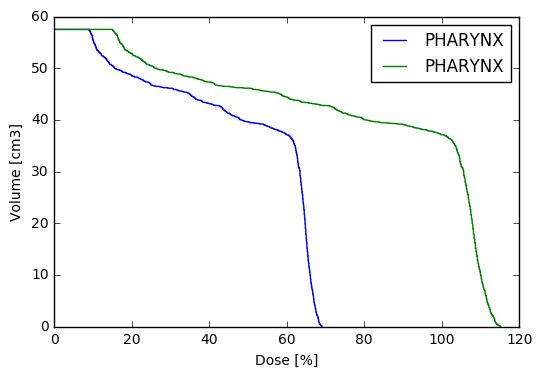

In [117]:
calcdvh.plot()
## have to do this to add prescription dose,a nd can specify cumualtive etc
testabc = dvh.DVH(counts = calcdvh.counts,bins = calcdvh.bins,rx_dose=60)
## can convert to relative dose
testabc123  =dvh.DVH.relative_dose(calcdvh,rx_dose=60)
testabc123.plot()

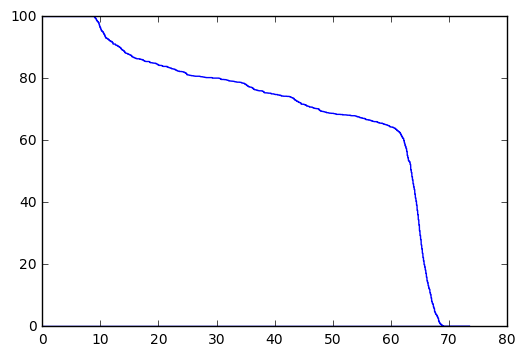

In [118]:
cdvh1 = list(abc123['cdvh'])
ddvh1 = list(abc123['ddvh'])
plt.plot(abc123['dose']/100,cdvh1)
dvh1 = dvh.DVH.from_data(data=cdvh1,binsize=1)
#dvh1.plot()

In [119]:
binsize = abc123['dose'][1]-abc123['dose'][0] # 1cGy for my data
test1 = dvh.DVH.from_data(data=abc123['cdvh'])
test2=dvh.DVH(test1.counts,test1.bins,rx_dose=56,dvh_type='cumulative')

In [120]:
test1

DVH(cumulative, 100 bins: [0.0:100.0] Gy, volume: 5325 cm3, name: None, rx_dose: 0 Gy)

In [121]:
test2.counts

array([1515,   20,   10,   40,   20,   10,   10,   20,   10,   10,   20,
         10,   10,   10,   20,   10,    0,   10,   10,   20,    0,   10,
         10,   10,    0,   10,   10,    0,   10,   10,   10,    0,   10,
          0,   10,    0,   10,   10,    0,   10,   10,   10,   10,    0,
         10,   10,   10,   10,   10,   10,   10,    0,   10,   30,   10,
         10,   10,   20,   10,   20,   20,   30,   40,   70,  130,  170,
        210,  230,  430,  130,  180,  130,   90,   90,  290,  200,  170,
        100,  200,  250,  520,  100,  160,  210,  170,  160,  190,   80,
         70,   60,   80,   80,   70,   30,   30,   40,   20,   20,   40,
        930], dtype=int32)

DVH(cumulative, 100 bins: [0.0:100.0] Gy, volume: 5325 cm3, name: None, rx_dose: 56 Gy)

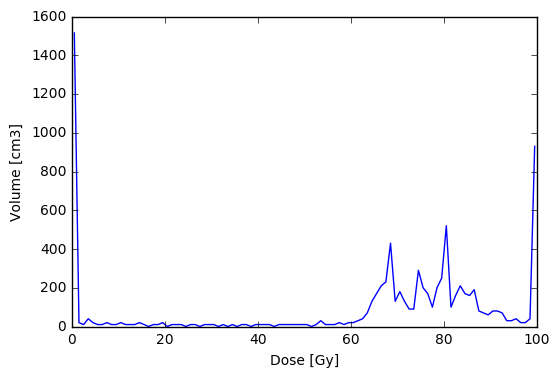

In [122]:
## using the dicompyler-core to analyse the DVH doesnt seemt o work with my data.
## have tried ot post on teh google group, but post not showing?
test2.plot()

DVH(cumulative, 100 bins: [0.0:100.0] Gy, volume: 5325 cm3, name: None, rx_dose: 56 Gy)

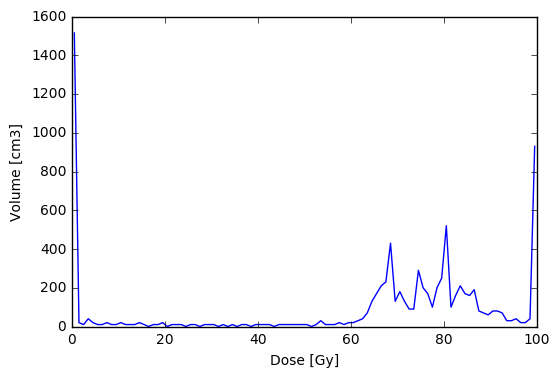

In [123]:
dvh.DVH.plot(test2)

## Try and read a volume (%) from a supplied dose (Gy) for a singel dataset.

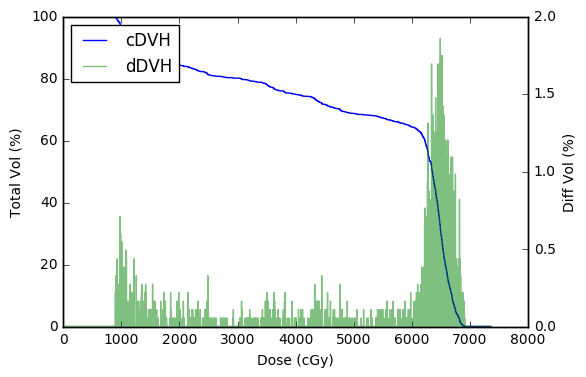

In [129]:
## get a dataset
pt = '1001'
struct = 'pharynx'
data1 = dvh_plot_diff(df=df,pt=pt,struct=struct,plot=True)
## dose, cdvh and ddvh and mean are contained in a dictionary

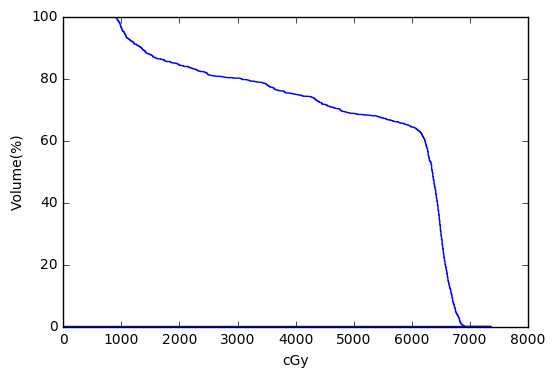

In [134]:
## plot the CDVH
doses = data1['dose']
cdvhs = data1['cdvh']
plt.plot(doses,cdvhs)
plt.xlabel('cGy')
plt.ylabel('Volume(%)')

In [191]:
def get_vol_at_dose_val(data,dose_val,plot=True):
    """
    Function to find the volume form teh cumulative DVH from a given dose.
    Plot of the cDVH and the point of interest can be produced (and is by defualt)
    """
    doses = data['dose']
    cdvhs = data['cdvh']
    index = None
    dose_pt = dose_val
    
    ## find the index for the dose of interest
    for i in range(len(doses)):
        if doses[i] >= dose_pt:
            index=i
            break
    
    ## get the volume at the dose of interest
    vol_val = cdvhs[index]
    
    ## make a plot if desired
    if plot==True:
        plt.plot(doses,cdvhs,color='green')
        plt.xlabel('Dose (cGy)')
        plt.ylabel('Volume (%)')
        plt.axhline(vol_val,color='grey',alpha=0.8)
        plt.axvline(index,color='grey',alpha=0.8)
        plt.plot(dose_pt,vol_val,marker='o',ms=3,ls='',c='black',alpha=0.8)
        plt.title(str(round(vol_val,2)) + ' % volume at a dose of ' + str(dose_pt) + 'cGy')
        plt.show()
        
    return vol_val

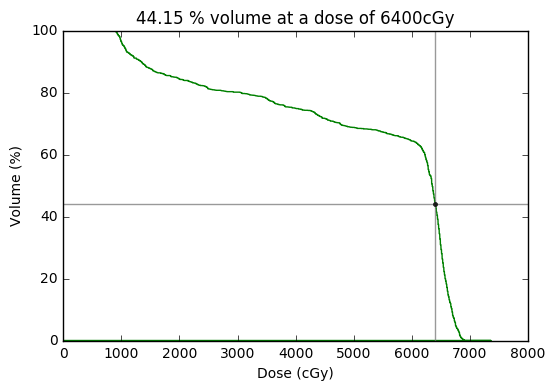

44.15300546


In [194]:
vol_ret = get_vol_at_dose_val(data1,6400)
print(vol_ret)